<a href="https://colab.research.google.com/github/assalaabnk/OOD_hackathon/blob/main/Isolation_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## isic2019 for both training and testing

In [ ]:
! pip install -q kaggle


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggleA.json to kaggleA.json


In [ ]:
!mkdir ~/.kaggle
!cp kaggleA.json ~/.kaggle/kaggle.json

In [ ]:
# Set permissions for the API key
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/isic-2019 -p /content


100% 9.09G/9.10G [01:51<00:00, 71.0MB/s]
100% 9.10G/9.10G [01:51<00:00, 87.6MB/s]


In [ ]:
!unzip /content/isic-2019.zip -d /content/isic-2019


Streaming output truncated to the last 5000 lines.
  inflating: /content/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065358.jpg  
  inflating: /content/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065359.jpg  
  inflating: /content/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065360.jpg  
  inflating: /content/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065361.jpg  
  inflating: /content/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065362.jpg  
  inflating: /content/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065366.jpg  
  inflating: /content/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065367.jpg  
  inflating: /content/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065368.jpg  
  inflating: /content/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0065370.jpg  
  inflating: /content/isic-2019/ISIC_201

#PCA

In [ ]:
import pandas as pd

groundtruth = pd.read_csv("../content/isic-2019/ISIC_2019_Training_GroundTruth.csv")
groundtruth = groundtruth.set_index("image")
indist = list(groundtruth.index)

In [ ]:
import os
from pathlib import Path
import numpy as np
from PIL import Image

X_data = []
#ood_data_darker = []
#ood_data_lighter = []
#ood_data = []

folder_dir = "../content/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input"
images = Path(folder_dir).glob("*.jpg")
count = 0
for i in list(images)[:10000]:
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((32, 32), Image.Resampling.LANCZOS)).ravel()
    if i.stem in indist:
        X_data.append(img_resize)
        count += 1
    # elif i.stem in oodist:
    #    ood_data.append(img_resize)

count the number of images in ISIC 2019

In [ ]:
folder_dir = "../content/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input"
images = Path(folder_dir).glob("*.jpg")
num_images = len(list(images))
print("Number of images:", num_images)

Number of images: 25331


###fitzpatrick 17k dataset

count the number of images for dark and light skin tones





In [ ]:
darker_dir = "../content/drive/MyDrive/Assala Master Project/Datasets/dataset/Darker_Skin_Tones"
lighter_dir = "../content/drive/MyDrive/Assala Master Project/Datasets/dataset/Lighter_Skin_Tones"

# Process images from the darker directory
darker_images = Path(darker_dir).glob("*.jpg")
lighter_images = Path(lighter_dir).glob("*.jpg")

num_D_images = len(list(darker_images))
print("Number of darker images:", num_D_images)

num_L_images = len(list(lighter_images))
print("Number of lighter images:", num_L_images)

Number of darker images: 1318
Number of lighter images: 10904


In [ ]:
ood_darker = []
ood_lighter = []
ood_data = []
# Define the directories for both darker and lighter images
darker_dir = "../content/drive/MyDrive/Assala Master Project/Datasets/dataset/Darker_Skin_Tones"
lighter_dir = "../content/drive/MyDrive/Assala Master Project/Datasets/dataset/Lighter_Skin_Tones"

# Process images from the darker directory
darker_images = Path(darker_dir).glob("*.jpg")
for i in darker_images:
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((32, 32), Image.Resampling.LANCZOS)).ravel()
    ood_darker.append(img_resize)
    ood_data.append(img_resize)

# Process images from the lighter directory
lighter_images = Path(lighter_dir).glob("*.jpg")
for i in list(lighter_images)[:3300]:
    image = Image.open(i).convert("RGB")
    img_resize = np.array(image.resize((32, 32), Image.Resampling.LANCZOS)).ravel()
    ood_lighter.append(img_resize)
    ood_data.append(img_resize)

In [ ]:
ood_data = np.array(ood_data)
ood_lighter= np.array(ood_lighter)
ood_darker = np.array(ood_darker)

In [ ]:
len(X_data) , len(ood_data),len(ood_lighter) , len(ood_darker)

(10000, 4618, 3300, 1318)

In [ ]:
import numpy as np

X_array = np.array(X_data)
ood_array = np.array(ood_data)  #for all
ood_D_array = np.array(ood_darker) #for darker only
ood_L_array = np.array(ood_lighter) #for lighter only


for 2 classes

In [ ]:
y_ind = np.zeros(X_array.shape[0])  # not a OOD sample
#y_ood= np.ones(ood_array.shape[0])  # an OOD sample for all
#y_ood= np.ones(ood_D_array.shape[0]) # an OOD sample for darker only
y_ood= np.ones(ood_L_array.shape[0]) #an OOD sample for lighter only
X = np.concatenate([X_array, ood_L_array ])
y = np.concatenate([y_ind, y_ood])
print(X.shape, y.shape)

(13300, 3072) (13300,)


In [ ]:
y_ind = np.zeros(X_array.shape[0])  # not a OOD sample
#y_ood= np.ones(ood_array.shape[0])  # an OOD sample for all
y_ood= np.ones(ood_D_array.shape[0]) # an OOD sample for darker only
#y_ood= np.ones(ood_L_array.shape[0]) #an OOD sample for lighter only
X = np.concatenate([X_array, ood_D_array ])
y = np.concatenate([y_ind, y_ood])
print(X.shape, y.shape)

(11318, 3072) (11318,)


In [ ]:
y_ind = np.zeros(X_array.shape[0])  # not a OOD sample
y_ood= np.ones(ood_array.shape[0])  # an OOD sample for all
#y_ood= np.ones(ood_D_array.shape[0]) # an OOD sample for darker only
#y_ood= np.ones(ood_L_array.shape[0]) #an OOD sample for lighter only
X = np.concatenate([X_array, ood_array ])
y = np.concatenate([y_ind, y_ood])
print(X.shape, y.shape)

(14618, 3072) (14618,)


For mutiple classes

In [ ]:
y_ind = np.zeros(X_array.shape[0])  # not an OOD sample
y_ood= np.ones(ood_array.shape[0]) *1 # an OOD sample
y_ood_D = np.ones(ood_D_array.shape[0]) * 2  # an OOD sample (darker)
y_ood_L = np.ones(ood_L_array.shape[0]) * 3  # an OOD sample (lighter)
X = np.concatenate([X_array, ood_D_array, ood_L_array])
y = np.concatenate([y_ind, y_ood_D, y_ood_L])
print(X.shape, y.shape)

(14618, 3072) (14618,)


###PCA visualization

for multiple classes

explained variance ratio (first two components): [0.44755631 0.12470864]


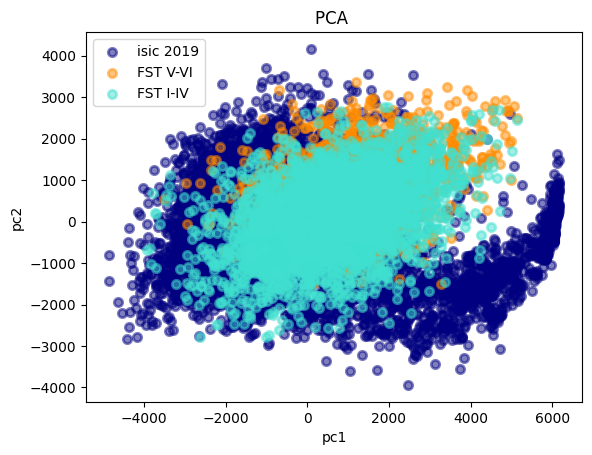

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import aux
import importlib

importlib.reload(aux)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

aux.plot_pca(X_pca, y)

plt.show()

2 classes only

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import auxx
import importlib

importlib.reload(auxx)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)



explained variance ratio (first two components): [0.46313625 0.12118103]


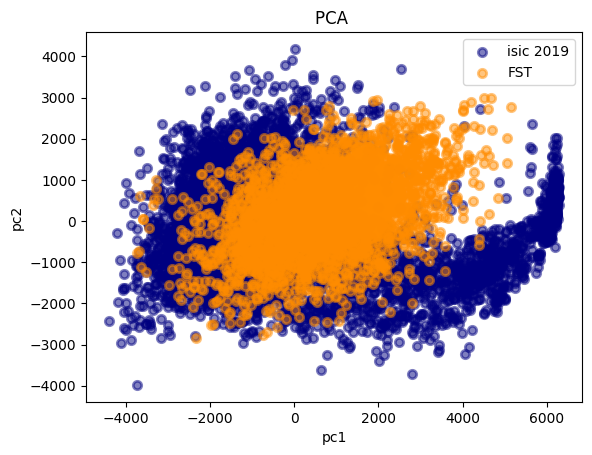

In [ ]:
auxx.plot_pca(X_pca, y)

plt.show()

#Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.4, stratify=y, random_state=42)

clf = IsolationForest(max_samples=200, random_state=0)
clf.fit(X_train)

IsolationForest(max_samples=200, random_state=0)

###Isolation Forest Parameter tuning with gridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score
import joblib

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, stratify=y, random_state=42)



# Define the IsolationForest model
clf = IsolationForest(random_state=0)



# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300], #,list(range(100, 800, 5))
    'max_samples': list(range(100, 200, 5)),
    'contamination': [0.1, 0.2,0.3],
    #'max_features': [2, 5, 10],
    'bootstrap': [True, False]
}




# Create a custom scoring function for F1 score with average='micro'
f1sc = make_scorer(f1_score, average='micro')




# Create the GridSearchCV instance
grid_estimator = GridSearchCV(clf, param_grid, scoring=f1sc, refit=True, cv=5, return_train_score=True,n_jobs=-1)
grid_estimator.fit(X_train, y_train)


# Print the best parameters and best F1 score
best_params = grid_estimator.best_params_
best_f1_score = grid_estimator.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score:", best_f1_score)




#save the grid search
joblib.dump(grid_estimator, 'grid_search_results.pkl')


# Save the best parameters and best F1 score to a text file
with open('grid_search_results.txt', 'w') as file:
    file.write(f"Best Parameters: {best_params}\n")
    file.write(f"Best F1 Score: {best_f1_score}\n")

KeyboardInterrupt: ignored

grid search for multiclasses

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, stratify=y, random_state=42)

# Create an empty dictionary to store the best parameters and F1 scores for each class
best_params_by_class = {}
best_scores_by_class = {}

# Loop through each class and perform grid search
for class_label in [0, 2, 3]:  # Replace with your class labels
    print(f"Grid search for class {class_label}")

    # Define the IsolationForest model
    clf = IsolationForest(random_state=0)

    # Define the parameter grid
    param_grid = {
        'n_estimators': list(range(100, 800, 5)),
        'max_samples': list(range(100, 200, 5)),
        'contamination': [0.1, 0.2, 0.3],
        'max_features': [2,5, 10],
        'bootstrap': [True, False]
    }

    # Create a custom scoring function for F1 score with average='micro'
    f1sc = make_scorer(f1_score, average='micro')

    # Create the GridSearchCV instance
    grid_estimator = GridSearchCV(clf, param_grid, scoring=f1sc, refit=True, cv=3, return_train_score=True, n_jobs=-1)
    grid_estimator.fit(X_train, (y_train == class_label).astype(int))

    # Store the best parameters and F1 score for this class
    best_params_by_class[class_label] = grid_estimator.best_params_
    best_scores_by_class[class_label] = grid_estimator.best_score_

    print(f"Best Parameters for class {class_label}: {best_params_by_class[class_label]}")
    print(f"Best F1 Score for class {class_label}: {best_scores_by_class[class_label]}")


Grid search for class 0


##Model building after getting the best parameter from the grid search :

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.4, stratify=y, random_state=42)
best_clf = IsolationForest(n_estimators=300, contamination=0.1, bootstrap=False, random_state=0)
best_clf.fit(X_train)
y_pred = best_clf.predict(X_test)

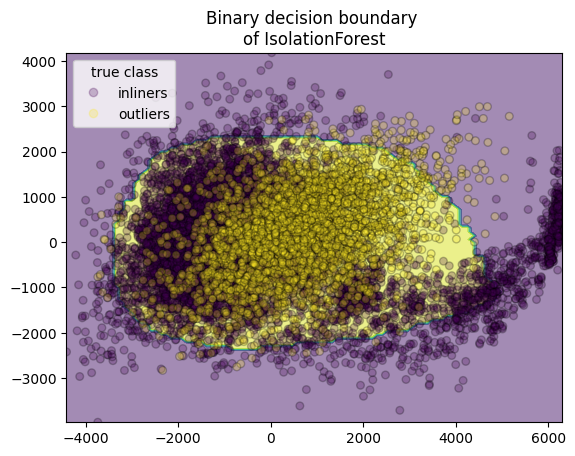

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    best_clf,
    X_pca,
    response_method="predict",
    alpha=0.5,
)

sc = disp.ax_.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, alpha=0.25, edgecolor="k")
handles, labels = sc.legend_elements()
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.legend(handles=handles, labels=["inliners", "outliers"], title="true class")
plt.show()

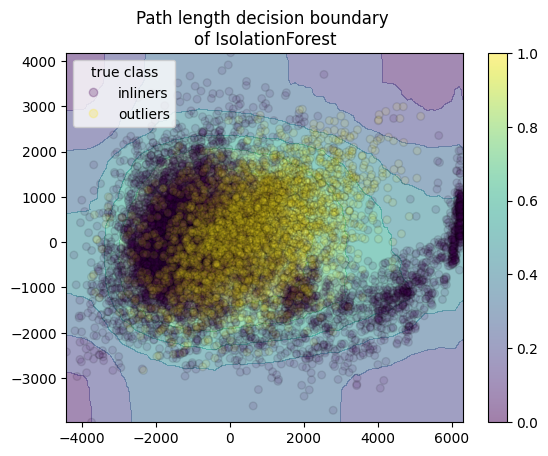

In [ ]:
disp = DecisionBoundaryDisplay.from_estimator(
    best_clf,
    X_pca,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, alpha=0.1, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.legend(handles=handles, labels=["inliners", "outliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()

### For all best param

auc:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Define a custom scoring function for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC AUC scoring
auc_scores_all = cross_val_score(best_clf, X_test, y_test, cv=5, scoring=roc_auc_scorer)
print("auc scores all:", auc_scores_all)
print("Mean auc score all:", auc_scores_all.mean())
print("Standard deviation of auc scores all:", auc_scores_all.std())

auc scores all: [0.50931337 0.52837945 0.51348128 0.540607   0.53968405]
Mean auc score all: 0.5262930324023477
Standard deviation of auc scores all: 0.0129692868633459


In [ ]:
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
y_test

array([ 1., -1.,  1., ..., -1., -1.,  1.])

F1 score:

In [ ]:
f1_scores1 = cross_val_score(best_clf, X_test, y_test, cv=5, scoring='f1')
print("F1 scores:", f1_scores1)
print("Mean F1 score:", f1_scores1.mean())
print("Standard deviation of F1 scores:", f1_scores1.std())

F1 scores: [0.76848354 0.76989247 0.77498664 0.73318633 0.76584318]
Mean F1 score: 0.7624784318834912
Standard deviation of F1 scores: 0.014945456839712332


summary:

In [ ]:
print(
    classification_report(
        y_test,
        best_clf.predict(X_test),
        target_names=["Out-distribution", "In-distribution"],
    )
)

                  precision    recall  f1-score   support

Out-distribution       0.20      0.06      0.09      1847
 In-distribution       0.67      0.88      0.76      4001

        accuracy                           0.62      5848
       macro avg       0.44      0.47      0.43      5848
    weighted avg       0.52      0.62      0.55      5848



##Dark only best params

auc:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Define a custom scoring function for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC AUC scoring
auc_scores_darker = cross_val_score(best_clf, X_test, y_test, cv=5, scoring=roc_auc_scorer)
print("auc scores darker:", auc_scores_darker)
print("Mean auc score darker:", auc_scores_darker.mean())
print("Standard deviation of auc scores darker:", auc_scores_darker.std())

auc scores darker: [0.47346126 0.47801434 0.49056669 0.44948821 0.47609108]
Mean auc score darker: 0.4735243159745933
Standard deviation of auc scores darker: 0.013378563385241177


F1 score:

In [ ]:
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
y_test

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
f1_scores_darker = cross_val_score(best_clf, X_test, y_test, cv=5, scoring='f1')
print("F1 scores darker:", f1_scores_darker)
print("Mean F1 score darker:", f1_scores_darker.mean())
print("Standard deviation of F1 scores darker:", f1_scores_darker.std())

F1 scores darker: [0.8915212  0.89944479 0.89068323 0.89912827 0.90135635]
Mean F1 score darker: 0.8964267666331601
Standard deviation of F1 scores darker: 0.004421768548569421


summary [dark only]

In [ ]:
print(
    classification_report(
        y_test,
        best_clf.predict(X_test),
        target_names=["Out-distribution", "In-distribution"],
    )
)

                  precision    recall  f1-score   support

Out-distribution       0.19      0.17      0.18       527
 In-distribution       0.89      0.90      0.90      4001

        accuracy                           0.82      4528
       macro avg       0.54      0.54      0.54      4528
    weighted avg       0.81      0.82      0.81      4528



##Light only best params

auc:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Define a custom scoring function for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC AUC scoring
auc_scores_lighter = cross_val_score(best_clf, X_test, y_test, cv=5, scoring=roc_auc_scorer)
print("auc scores lighter:", auc_scores_lighter)
print("Mean auc score lighter:", auc_scores_lighter.mean())
print("Standard deviation of auc scores lighter:", auc_scores_lighter.std())

auc scores lighter: [0.53125    0.52981061 0.5305092  0.52122134 0.52230987]
Mean auc score lighter: 0.5270202030607065
Standard deviation of auc scores lighter: 0.004328156370330682


F1 score:

In [ ]:
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
y_test

array([ 1., -1.,  1., ...,  1.,  1.,  1.])

In [ ]:
f1_scores_lighter = cross_val_score(best_clf, X_test, y_test, cv=5, scoring='f1')
print("F1 scores lighter:", f1_scores_lighter)
print("Mean F1 score lighter:", f1_scores_lighter.mean())
print("Standard deviation of F1 scores lighter:", f1_scores_lighter.std())

F1 scores lighter: [0.80569801 0.81306306 0.79099307 0.80297824 0.8172043 ]
Mean F1 score lighter: 0.8059873354795595
Standard deviation of F1 scores lighter: 0.00905375700014601


Summary Light only:

In [ ]:
print(
    classification_report(
        y_test,
        best_clf.predict(X_test),
        target_names=["Out-distribution", "In-distribution"],
    )
)

                  precision    recall  f1-score   support

Out-distribution       0.13      0.05      0.07      1320
 In-distribution       0.74      0.88      0.80      4000

        accuracy                           0.68      5320
       macro avg       0.43      0.47      0.44      5320
    weighted avg       0.59      0.68      0.62      5320



__________________________________________________________________________________________________________________________
_____________________________________________________________

for 2 classes

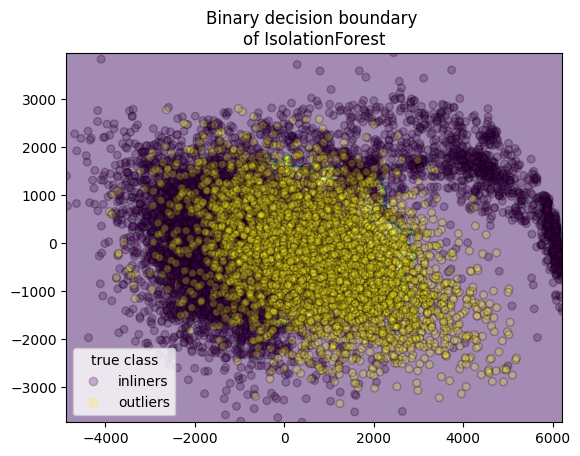

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_pca,
    response_method="predict",
    alpha=0.5,
)

sc = disp.ax_.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, alpha=0.25, edgecolor="k")
handles, labels = sc.legend_elements()
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.legend(handles=handles, labels=["inliners", "outliers"], title="true class")
plt.show()

for multiple classes

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


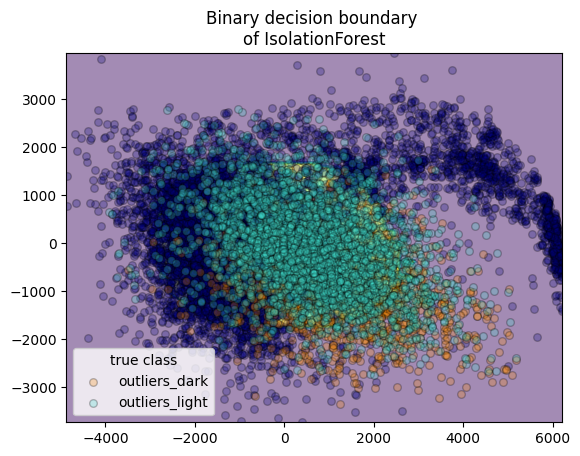

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_pca,
    response_method="predict",
    alpha=0.5,
)

colors = ["navy", "darkorange", "turquoise"]  # Colors for inliers, outliers_dark, and outliers_light
outlier_labels = ["outliers_dark", "outliers_light"]

sc = disp.ax_.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], c=colors[0], s=30, alpha=0.25, edgecolor="k")
sc = disp.ax_.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], c=colors[1], s=30, alpha=0.25, edgecolor="k", label="outliers_dark")
sc = disp.ax_.scatter(X_pca[y == 3, 0], X_pca[y == 3, 1], c=colors[2], s=30, alpha=0.25, edgecolor="k", label="outliers_light")

handles, labels = sc.legend_elements()
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.legend(handles=handles, labels=["inliers"] + outlier_labels, title="true class")
plt.show()


for 2 classes

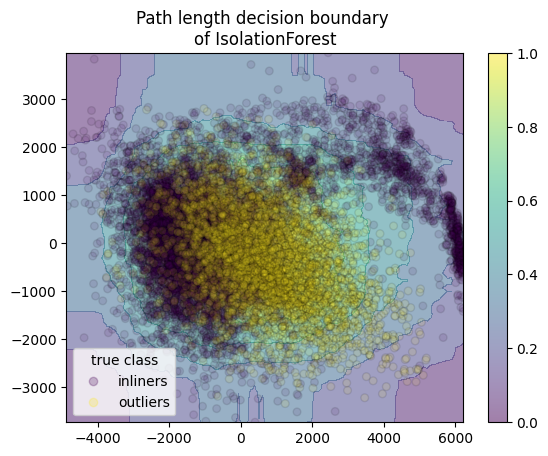

In [ ]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_pca,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=30, alpha=0.1, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.legend(handles=handles, labels=["inliners", "outliers"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()

for multiple classes

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


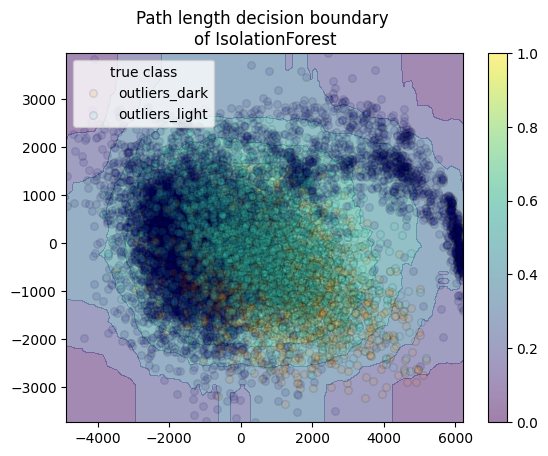

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_pca,
    response_method="decision_function",
    alpha=0.5,
)

colors = ["navy", "darkorange", "turquoise"]  # Colors for inliers, outliers_dark, and outliers_light
outlier_labels = ["outliers_dark", "outliers_light"]

sc = disp.ax_.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], c=colors[0], s=30, alpha=0.1, edgecolor="k")
sc = disp.ax_.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], c=colors[1], s=30, alpha=0.1, edgecolor="k", label="outliers_dark")
sc = disp.ax_.scatter(X_pca[y == 3, 0], X_pca[y == 3, 1], c=colors[2], s=30, alpha=0.1, edgecolor="k", label="outliers_light")

handles, labels = sc.legend_elements()
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.legend(handles=handles, labels=["inliers"] + outlier_labels, title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()


histogram for scores

In [ ]:
anomaly_scores_inliers = clf.score_samples(X_test[y_test== 0])
anomaly_scores_darker = clf.score_samples(X_test[y_test== 2])
anomaly_scores_lighter= clf.score_samples(X_test[y_test == 3])

print("Number of inliers samples:", np.sum(y_test == 0))
print("Number of darker outliers samples:", np.sum(y_test == 2))
print("Number of lighter outliers samples:", np.sum(y_test == 3))

Number of inliers samples: 4001
Number of darker outliers samples: 527
Number of lighter outliers samples: 1320


In [ ]:
count_lighter_below_threshold = np.sum(np.abs(anomaly_scores_lighter) < 0.5)
count_darker_below_threshold = np.sum(np.abs(anomaly_scores_darker) < 0.5)

print("Number of lighter outliers samples below 0.5:", count_lighter_below_threshold)
print("Number of darker outliers samples below 0.5:", count_darker_below_threshold)


Number of lighter outliers samples below 0.5: 1082
Number of darker outliers samples below 0.5: 332


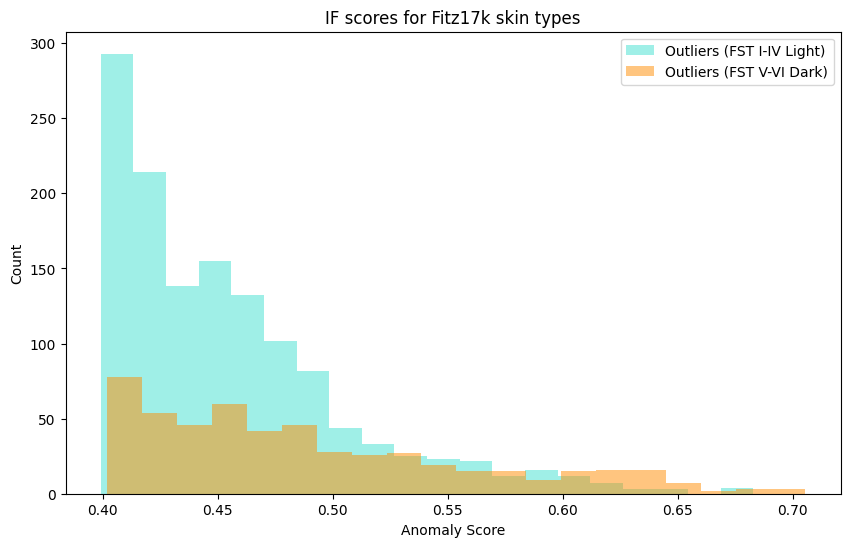

In [ ]:
# Plot histograms for anomaly scores of each category
plt.figure(figsize=(10, 6))
#plt.hist(abs(anomaly_scores_inliers), bins=20, alpha=0.5, color="navy", label="Inliers (ISIC)")
#plt.hist(abs(anomaly_scores_darker), bins=20, alpha=0.5, color="darkorange", label="Outliers (FST V-VI Dark)")
plt.hist(abs(anomaly_scores_lighter), bins=20, alpha=0.5, color="turquoise", label="Outliers (FST I-IV Light)")
plt.hist(abs(anomaly_scores_darker), bins=20, alpha=0.5, color="darkorange", label="Outliers (FST V-VI Dark)")

# Add titles and labels
plt.title("Score Histograms for Different Categories")
plt.xlabel("Anomaly Score")
plt.ylabel("Count")
plt.legend()
plt.title("IF scores for Fitz17k skin types")
plt.show()

convert to binary

In [ ]:
anomaly_scores_inliers = clf.score_samples(X_test[y_test== 0])
anomaly_scores_outliers = clf.score_samples(X_test[y_test== 1])


print("Number of inliers samples:", np.sum(y_test == 0))
print("Number of all outliers samples:", np.sum(y_test == 1))


Number of inliers samples: 4001
Number of all outliers samples: 1847


In [ ]:
print(y_test)

[0. 1. 0. ... 1. 1. 0.]


##For all

calculate auc and F1 scores

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc

fpr, tpr, thresholds_sorted = roc_curve(y_test, clf.predict(X_test))
aucuc = auc(fpr, tpr)
aucuc

0.5306185635507745

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc

fpr, tpr, thresholds_sorted = roc_curve(y_test, clf.predict(X_test))
aucuc = auc(fpr, tpr)
aucuc

0.53126451738446

average auc

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Define a custom scoring function for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC AUC scoring
auc_scores_all = cross_val_score(clf, X_test, y_test, cv=5, scoring=roc_auc_scorer)
print("auc scores all:", auc_scores_all)
print("Mean auc score all:", auc_scores_all.mean())
print("Standard deviation of auc scores all:", auc_scores_all.std())


auc scores all: [0.5298187  0.52948617 0.53353141 0.51603734 0.52003118]
Mean auc score all: 0.5257809601727427
Standard deviation of auc scores all: 0.0066045355039442005


In [ ]:
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
y_test

array([ 1., -1.,  1., ..., -1., -1.,  1.])

In [ ]:
y_test[y_test == 2] = -1  # Convert to anomaly detection format: outliers_dark
y_test[y_test == 3] = -1  # Convert to anomaly detection format: outliers_light

In [ ]:
from sklearn.model_selection import cross_val_score


# Create an instance of the IsolationForest model
clf = IsolationForest(max_samples=200, random_state=0)
clf.fit(X_train)
# Perform cross-validation with 5 folds and calculate F1 scores using 'macro' average
f1_scores = cross_val_score(clf, X_test, y_test, cv=5, scoring='f1_macro')
#cross_val_score(model, X,Y, scoring='f1' ,cv=5)


f1 scores

In [ ]:
f1_scores1 = cross_val_score(clf, X_test, y_test, cv=5, scoring='f1')

In [ ]:
f1_scores1 = cross_val_score(clf, X_test, y_test, cv=5, scoring='f1')
print("F1 scores:", f1_scores1)
print("Mean F1 score:", f1_scores1.mean())
print("Standard deviation of F1 scores:", f1_scores1.std())

F1 scores: [0.68181818 0.70341522 0.68681983 0.68784362 0.70830878]
Mean F1 score: 0.6936411255594395
Standard deviation of F1 scores: 0.010301418971533593


macro f1

In [ ]:
print(f1_scores)

[0.47714505 0.48285515 0.46585889 0.47944249 0.46803895]


In [ ]:
print("macro_F1 scores:", f1_scores)
print("Mean macro_F1 score:", f1_scores.mean())
print("Standard deviation of macro_F1 scores:", f1_scores.std())

macro_F1 scores: [0.47714505 0.48285515 0.46585889 0.47944249 0.46803895]
Mean macro_F1 score: 0.47466810592970565
Standard deviation of macro_F1 scores: 0.006595538878025568


In [ ]:
print(
    classification_report(
        y_test,
        clf.predict(X_test),
        target_names=["Out-distribution", "In-distribution"],
    )
)

                  precision    recall  f1-score   support

Out-distribution       0.26      0.21      0.24      1847
 In-distribution       0.67      0.72      0.69      4001

        accuracy                           0.56      5848
       macro avg       0.46      0.47      0.46      5848
    weighted avg       0.54      0.56      0.55      5848



##Darker only

auc

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc

fpr, tpr, thresholds_sorted = roc_curve(y_test, clf.predict(X_test))
aucuc = auc(fpr, tpr)
aucuc

0.4034902090416675

average auc

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Define a custom scoring function for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC AUC scoring
auc_scores_darker = cross_val_score(clf, X_test, y_test, cv=5, scoring=roc_auc_scorer)
print("auc scores darker:", auc_scores_darker)
print("Mean auc score darker:", auc_scores_darker.mean())
print("Standard deviation of auc scores darker:", auc_scores_darker.std())

auc scores darker: [0.40760075 0.39226661 0.44214703 0.39639402 0.38187774]
Mean auc score darker: 0.4040572310722094
Standard deviation of auc scores darker: 0.02075120727001526


F1 scores

In [ ]:
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
y_test

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
from sklearn.model_selection import cross_val_score


# Create an instance of the IsolationForest model
#clf = IsolationForest(max_samples=200, random_state=0)
#clf.fit(X_train)
# Perform cross-validation with 5 folds and calculate F1 scores using 'macro' average
f1_scores_darker = cross_val_score(clf, X_test, y_test, cv=5, scoring='f1')
#cross_val_score(model, X,Y, scoring='f1' ,cv=5)

In [ ]:
print("F1 scores darker:", f1_scores_darker)
print("Mean F1 score darker:", f1_scores_darker.mean())
print("Standard deviation of F1 scores darker:", f1_scores_darker.std())

F1 scores darker: [0.80701754 0.82425913 0.81649485 0.81926029 0.80925666]
Mean F1 score darker: 0.8152576951873662
Standard deviation of F1 scores darker: 0.006363798896020275


summary

In [ ]:
print(
    classification_report(
        y_test,
        clf.predict(X_test),
        target_names=["Out-distribution", "In-distribution"],
    )
)

                  precision    recall  f1-score   support

Out-distribution       0.19      0.49      0.28       527
 In-distribution       0.92      0.73      0.81      4001

        accuracy                           0.70      4528
       macro avg       0.55      0.61      0.54      4528
    weighted avg       0.83      0.70      0.75      4528



##Lighter only

auc

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc

fpr, tpr, thresholds_sorted = roc_curve(y_test, clf.predict(X_test))
aucuc = auc(fpr, tpr)
aucuc

0.5283674242424242

average auc

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

# Define a custom scoring function for ROC AUC
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation with ROC AUC scoring
auc_scores_lighter = cross_val_score(clf, X_test, y_test, cv=5, scoring=roc_auc_scorer)
print("auc scores lighter:", auc_scores_lighter)
print("Mean auc score lighter:", auc_scores_lighter.mean())
print("Standard deviation of auc scores lighter:", auc_scores_lighter.std())

auc scores lighter: [0.51384592 0.52962121 0.5241335  0.49853439 0.53305016]
Mean auc score lighter: 0.519837037526265
Standard deviation of auc scores lighter: 0.012477760549659852


In [ ]:
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
y_test

array([ 1., -1.,  1., ...,  1.,  1.,  1.])

F1 scores

In [ ]:
from sklearn.model_selection import cross_val_score


# Create an instance of the IsolationForest model
clf = IsolationForest(max_samples=200, random_state=0)
clf.fit(X_train)
# Perform cross-validation with 5 folds and calculate F1 scores using 'macro' average
f1_scores_lighter = cross_val_score(clf, X_test, y_test, cv=5, scoring='f1')
#cross_val_score(model, X,Y, scoring='f1' ,cv=5)

In [ ]:
print("F1 scores lighter:", f1_scores_lighter)
print("Mean F1 score lighter:", f1_scores_lighter.mean())
print("Standard deviation of F1 scores lighter:", f1_scores_lighter.std())

F1 scores lighter: [0.72600127 0.72669626 0.72345836 0.72796935 0.76009792]
Mean F1 score lighter: 0.7328446315745099
Standard deviation of F1 scores lighter: 0.013705810699894416


summary

In [ ]:
print(
    classification_report(
        y_test,
        clf.predict(X_test),
        target_names=["Out-distribution", "In-distribution"],
    )
)

                  precision    recall  f1-score   support

Out-distribution       0.21      0.23      0.22      1320
 In-distribution       0.74      0.72      0.73      4000

        accuracy                           0.60      5320
       macro avg       0.47      0.47      0.47      5320
    weighted avg       0.61      0.60      0.60      5320



Visualize F1 scores

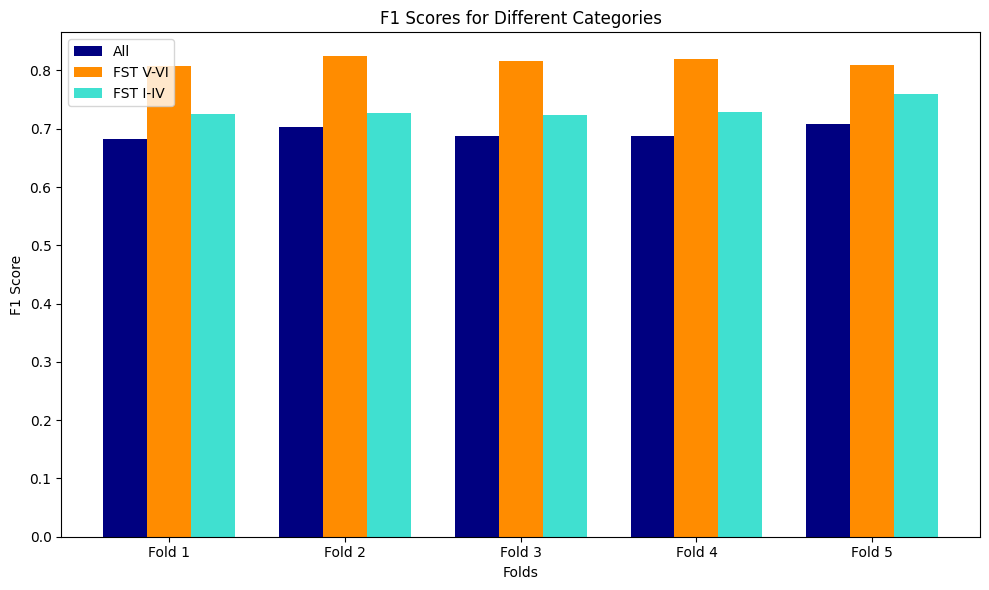

In [ ]:
import matplotlib.pyplot as plt

# F1 scores and labels
f1_scores_all = [0.68181818, 0.70341522, 0.68681983, 0.68784362, 0.70830878]
f1_scores_darker = [0.80701754, 0.82425913, 0.81649485, 0.81926029, 0.80925666]
f1_scores_lighter = [0.72600127, 0.72669626, 0.72345836, 0.72796935, 0.76009792]

labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']


plt.figure(figsize=(10, 6))
ax = plt.subplot(111)


bar_width = 0.25
x_positions = range(len(f1_scores_all))
ax.bar(x_positions, f1_scores_all, width=bar_width, align='center', label='All', color='navy')
ax.bar([pos + bar_width for pos in x_positions], f1_scores_darker, width=bar_width, align='center', label='FST V-VI', color='darkorange')
ax.bar([pos + 2 * bar_width for pos in x_positions], f1_scores_lighter, width=bar_width, align='center', label='FST I-IV', color='turquoise')

ax.set_xlabel('Folds')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores for Different Categories')
ax.set_xticks([pos + bar_width for pos in x_positions])
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


visualize the path